In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Dataset load
customers = pd.read_csv('C:/Users/avina/Downloads/Zeotap_Assignment/Customers.csv')
products = pd.read_csv('C:/Users/avina/Downloads/Zeotap_Assignment/Products.csv')
transactions = pd.read_csv('C:/Users/avina/Downloads/Zeotap_Assignment/Transactions.csv')

In [14]:
#Few rows
print("Customers:")
print(customers.head(), '\n')
print("Products:")
print(products.head(), '\n')
print("Transactions:")
print(transactions.head(), '\n')

Customers:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  20

In [15]:
#Data Inspection
print(customers.info())
print(products.info())
print(transactions.info())

#Check null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

#Summary 
print(transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

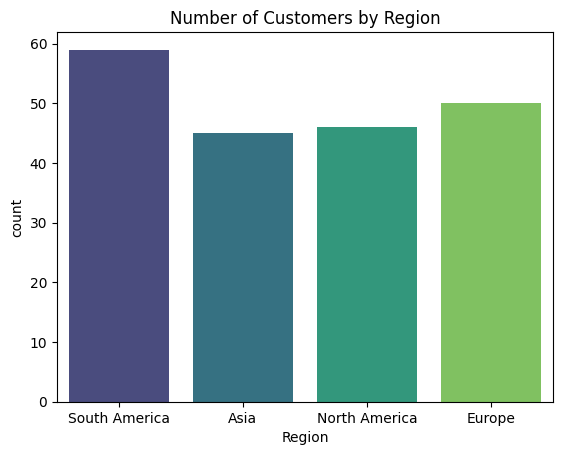

In [16]:
# Visualizations_1
# Signups (By region)
sns.countplot(data=customers, x='Region', hue='Region', palette='viridis', legend=False)
plt.title('Number of Customers by Region')
plt.show()

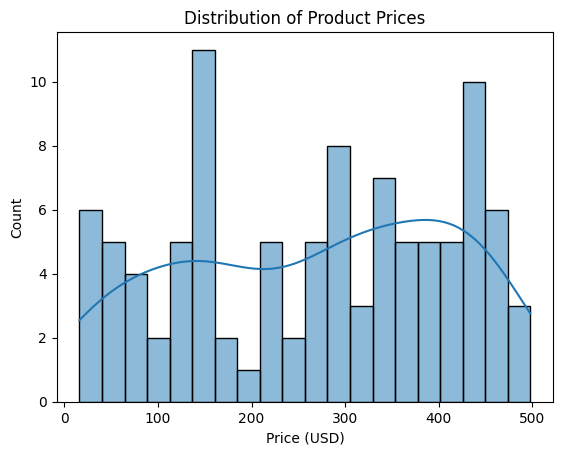

In [17]:
#Visualization_2
#Product prices distribution
sns.histplot(data=products, x='Price', bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.show()

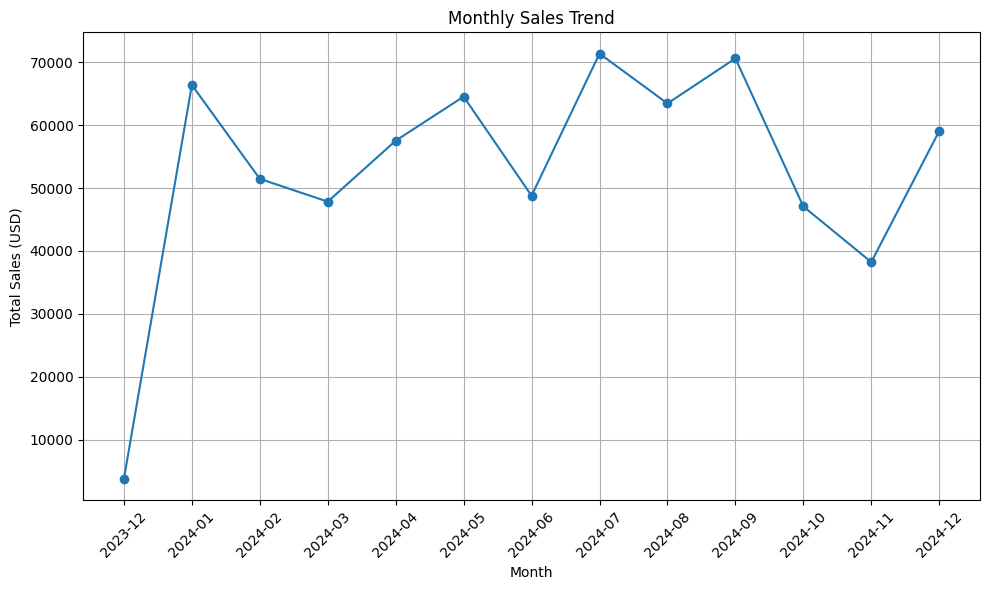

In [18]:
#Visualization_3
#Transactions v/s time

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [19]:
# Prepare data by merging datasets

#MERGING DATASETS

data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

print(data.columns)

#Profile creation of each customer
customer_profiles = data.groupby('CustomerID').agg({
    # Average product price purchased
    'Price_y': 'mean',  
     # Total quantity purchased
    'Quantity': 'sum', 
    # Total spend
    'TotalValue': 'sum'  
}).reset_index()

print(customer_profiles.head())

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'Month', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
  CustomerID     Price_y  Quantity  TotalValue
0      C0001  278.334000        12     3354.52
1      C0002  208.920000        10     1862.74
2      C0003  195.707500        14     2725.38
3      C0004  240.636250        23     5354.88
4      C0005  291.603333         7     2034.24


In [20]:
#Similarity Calculation (cosine similarity)

import os
import csv
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Assumed -> Customer_profiles DataFrame already created



# Normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(customer_profiles.iloc[:, 1:])

# Compute cosine similarity
similarity_matrix = cosine_similarity(features)
results = {}

# Iterate over customers to find their lookalikes
for i, customer_id in enumerate(customer_profiles['CustomerID']):
    
    similarities = list(enumerate(similarity_matrix[i]))
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[1:4]
    
    results[customer_id] = [(customer_profiles.iloc[idx, 0], round(score, 2)) for idx, score in similarities]

os.makedirs('outputs', exist_ok=True)

with open('outputs/Lookalike.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['CustomerID', 'Lookalikes'])
    
    for customer_id, lookalikes in results.items():
        # Format the list of lookalikes for writing
        lookalike_str = ', '.join([f'{lookalike[0]} ({lookalike[1]})' for lookalike in lookalikes])
        writer.writerow([customer_id, lookalike_str])

print("Lookalike model results written to 'outputs/Lookalike.csv'")

Lookalike model results written to 'outputs/Lookalike.csv'


In [39]:
print(data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'Month', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


In [21]:
print(data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x    Month     CustomerName         Region  SignupDate  \
0      300.68   300.68  2024-08   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  2024-05  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  2024-04  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  2024-03  Travis Campbell  South America  2024-04-11   
4      902.04   300.68  2024-03    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electroni

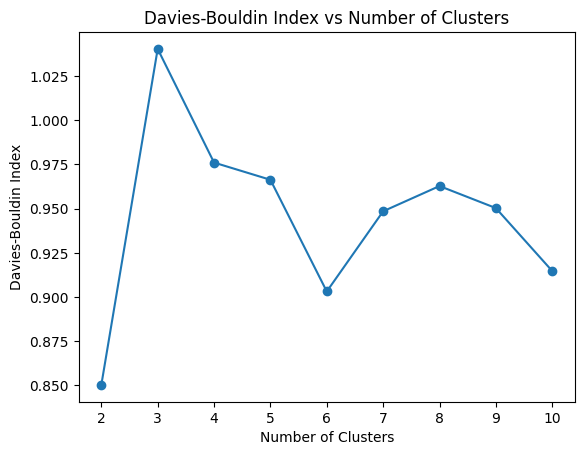

Optimal number of clusters: 2


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index
# Optimal number of clusters
scores = []
# Check for k from 2 to 10
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features)
    score = davies_bouldin_score(features, clusters)
    scores.append(score)

# Plot Index for each k
plt.plot(range(2, 11), scores, marker='o')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

#  lowest Davies-Bouldin index with one optimal k
optimal_k = scores.index(min(scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")

In [31]:
# Apply K-Means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(features)

print(customer_profiles.head())

  CustomerID     Price_y  Quantity  TotalValue  Cluster      PCA1      PCA2
0      C0001  278.334000        12     3354.52        1 -0.022514  0.019872
1      C0002  208.920000        10     1862.74        1 -0.186697 -0.121097
2      C0003  195.707500        14     2725.38        1 -0.042672 -0.178872
3      C0004  240.636250        23     5354.88        0  0.350037 -0.146925
4      C0005  291.603333         7     2034.24        1 -0.218669  0.082122


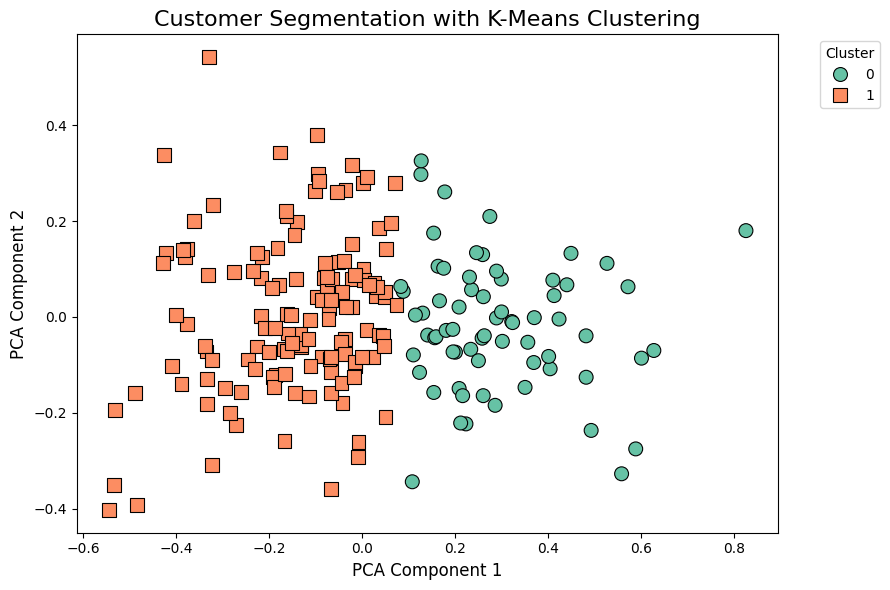

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 2D for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# DataFrame to hold the 2D PCA components and cluster labels
customer_profiles['PCA1'] = reduced_features[:, 0]
customer_profiles['PCA2'] = reduced_features[:, 1]

# Get unique clusters
unique_clusters = customer_profiles['Cluster'].nunique()

# Define marker styles based on the number of clusters
markers = ['o', 's', 'D', 'X', 'P', '^', 'v', '<', '>'][:unique_clusters]

# Plot the clusters
plt.figure(figsize=(9,6))

# Use Seaborn's scatterplot with dynamic markers
sns.scatterplot(data=customer_profiles, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', 
                style='Cluster', markers=markers, s=100, edgecolor='black', legend='full')

# Adding titles and labels for clarity
plt.title('Customer Segmentation with K-Means Clustering', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

# Display the legend
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with a clean layout
plt.tight_layout()
plt.show()

In [26]:
# Calculate final Davies-Bouldin Index 
db_index = davies_bouldin_score(features, customer_profiles['Cluster'])
print(f"Davies-Bouldin Index for the final clustering: {db_index}")

Davies-Bouldin Index for the final clustering: 0.8502362410640188
